In [1]:
import pandas as pd

In [2]:
cross_data = pd.read_csv('Train.csv')

/var/folders/y_/gxd2kn8n4576j2w9zkzksghr0000gn/T/ipykernel_21011/4098554031.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  cross_data = pd.read_csv('Train.csv')


In [3]:
print(cross_data)

          fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0         2015-01-28   1375586            N              ES    H   35   
1         2015-01-28   1050611            N              ES    V   23   
2         2015-01-28   1050612            N              ES    V   23   
3         2015-01-28   1050613            N              ES    H   22   
4         2015-01-28   1050614            N              ES    V   23   
...              ...       ...          ...             ...  ...  ...   
13647304  2016-05-28   1166765            N              ES    V   22   
13647305  2016-05-28   1166764            N              ES    V   23   
13647306  2016-05-28   1166763            N              ES    H   47   
13647307  2016-05-28   1166789            N              ES    H   22   
13647308  2016-05-28   1550586            N              ES    H   37   

          fecha_alta  ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  \
0         2015-01-12        0.0          6     

In [4]:
print(cross_data['indfall'])

0           N
1           N
2           N
3           N
4           N
           ..
13647304    N
13647305    N
13647306    N
13647307    N
13647308    N
Name: indfall, Length: 13647309, dtype: object


In [5]:
# Dropped deceased individuals in order to focus on cross-selling to living customers
cross_data = cross_data[cross_data['indfall'] != 'S']

In [6]:
# Created the 'Loans' data frame with selected columns for analysis
loans = cross_data[['ncodpers', 'ind_pres_fin_ult1', 'renta', 'age', 'sexo', 'antiguedad', 'ind_empleado', 'nomprov', 'pais_residencia']].copy()

In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13612547 entries, 0 to 13647308
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ncodpers           int64  
 1   ind_pres_fin_ult1  int64  
 2   renta              float64
 3   age                object 
 4   sexo               object 
 5   antiguedad         object 
 6   ind_empleado       object 
 7   nomprov            object 
 8   pais_residencia    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.0+ GB


In [8]:
loans.head(20)

,ncodpers,ind_pres_fin_ult1,renta,age,sexo,antiguedad,ind_empleado,nomprov,pais_residencia
0,1375586,0,87218.10,35,H,6,N,MALAGA,ES
1,1050611,0,35548.74,23,V,35,N,CIUDAD REAL,ES
2,1050612,0,122179.11,23,V,35,N,CIUDAD REAL,ES
3,1050613,0,119775.54,22,H,35,N,ZARAGOZA,ES
4,1050614,0,NaN,23,V,35,N,ZARAGOZA,ES
5,1050615,0,22220.04,23,H,35,N,TOLEDO,ES
6,1050616,0,295590.36,23,H,35,N,LEON,ES
7,1050617,0,113316.66,23,H,35,N,ZARAGOZA,ES
8,1050619,0,NaN,24,H,35,N,GIPUZKOA,ES
9,1050620,0,113194.98,23,H,35,N,CACERES,ES


In [9]:
max_value = loans['ind_pres_fin_ult1'].max()
print(max_value)

1


In [10]:
unique_values = loans['ind_pres_fin_ult1'].unique()
print(unique_values)

[0 1]


In [11]:
count_of_ones = loans['ind_pres_fin_ult1'].value_counts()[1]
print(count_of_ones)

35655


In [36]:
# Data frame for people with loans
has_loans = cross_data[cross_data['ind_pres_fin_ult1'] == 1][['ncodpers', 'ind_pres_fin_ult1', 'tiprel_1mes', 'renta', 'age', 'sexo', 'antiguedad', 'ind_empleado', 'nomprov', 'pais_residencia']].copy()

In [37]:
has_loans.drop_duplicates(subset = ['ncodpers'], keep = 'first', inplace = True)

In [38]:
has_loans.head(20)

,ncodpers,ind_pres_fin_ult1,tiprel_1mes,renta,age,sexo,antiguedad,ind_empleado,nomprov,pais_residencia
900,1052170,1,A,175959.00,36,V,35,N,BARCELONA,ES
3601,1056630,1,A,95362.23,26,V,34,N,MADRID,ES
27901,1022123,1,A,54038.43,27,V,36,N,JAEN,ES
28732,1020462,1,A,105267.30,35,H,37,N,SANTA CRUZ DE TENERIFE,ES
36434,1030004,1,A,60530.88,38,V,36,N,LUGO,ES
42677,1109903,1,A,46729.98,26,V,31,N,"PALMAS, LAS",ES
49647,1125124,1,A,221878.65,31,H,28,N,MADRID,ES
50797,1121973,1,NaN,NaN,NA,NaN,NA,NaN,NaN,NaN
53134,1125746,1,A,199219.77,52,V,28,N,MADRID,ES
53513,1126797,1,A,70302.54,26,V,21,N,MADRID,ES


In [39]:
has_loans.describe()

,ncodpers,ind_pres_fin_ult1,renta
count,2.445000e+03,2445.0,1.791000e+03
mean,5.348896e+05,1.0,1.144285e+05
std,2.385054e+05,0.0,1.316032e+05
min,1.591400e+04,1.0,1.377669e+04
25%,3.937950e+05,1.0,5.901045e+04
50%,6.048590e+05,1.0,8.484030e+04
75%,7.010870e+05,1.0,1.272257e+05
max,1.398523e+06,1.0,2.471156e+06


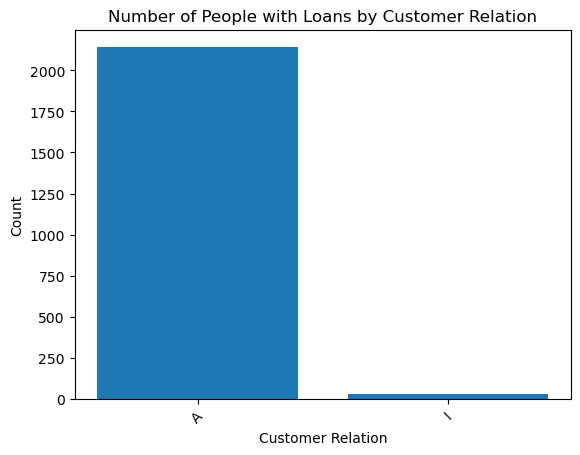

In [40]:
import matplotlib.pyplot as plt

# Counted occurrences of each value in 'tiprel_1mes'
tiprel_1mes_counts = has_loans['tiprel_1mes'].value_counts()

# Bar chart
plt.bar(tiprel_1mes_counts.index, tiprel_1mes_counts.values)
plt.xlabel('Customer Relation')
plt.ylabel('Count')
plt.title('Number of People with Loans by Customer Relation')
plt.xticks(rotation = 45)
plt.show()


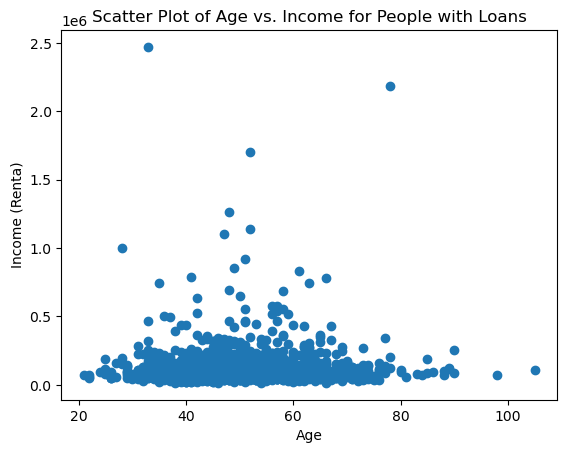

In [41]:
# Converted 'renta' and 'age' columns to numeric
has_loans['renta'] = pd.to_numeric(has_loans['renta'], errors = 'coerce')
has_loans['age'] = pd.to_numeric(has_loans['age'], errors = 'coerce')

# Dropped rows with missing values in 'age' or 'renta' columns
has_loans = has_loans.dropna(subset = ['age', 'renta'])

# Scatter plot
plt.scatter(has_loans['age'], has_loans['renta'])
plt.xlabel('Age')
plt.ylabel('Income (Renta)')
plt.title('Scatter Plot of Age vs. Income for People with Loans')
plt.show()

In [42]:
# Data frame for people without loans but have pensions
no_loans_with_pensions = cross_data[
    (cross_data['ind_pres_fin_ult1'] == 0) & 
    (cross_data['ind_plan_fin_ult1'] == 1)
][['ncodpers', 'ind_pres_fin_ult1', 'ind_plan_fin_ult1', 'tiprel_1mes', 'renta', 'age', 'sexo', 'antiguedad', 'ind_empleado', 'nomprov', 'pais_residencia']].copy()

In [43]:
no_loans_with_pensions.drop_duplicates(subset = ['ncodpers'], keep = 'first', inplace = True)

In [44]:
no_loans_with_pensions.head(20)

,ncodpers,ind_pres_fin_ult1,ind_plan_fin_ult1,tiprel_1mes,renta,age,sexo,antiguedad,ind_empleado,nomprov,pais_residencia
2595,1056056,0,1,A,51062.61,56,V,34,N,MADRID,ES
2917,1055638,0,1,A,66988.29,40,H,34,N,MADRID,ES
3808,1053138,0,1,A,79290.99,36,H,35,N,MURCIA,ES
4152,1052880,0,1,A,99477.30,63,H,35,N,MADRID,ES
4158,1052857,0,1,A,66299.34,30,H,35,N,MALAGA,ES
4728,1053879,0,1,A,76792.83,23,V,35,N,SEVILLA,ES
10158,1065031,0,1,A,178280.76,56,V,34,N,VALLADOLID,ES
11221,1064147,0,1,A,32449.86,48,V,34,N,CORDOBA,ES
11290,1064095,0,1,A,93825.81,53,H,34,N,SEVILLA,ES
12678,1068423,0,1,A,210631.62,54,V,34,N,BARCELONA,ES


In [45]:
no_loans_with_pensions.describe()

,ncodpers,ind_pres_fin_ult1,ind_plan_fin_ult1,renta
count,7.998000e+03,7998.0,7998.0,6.953000e+03
mean,3.167525e+05,0.0,1.0,1.804329e+05
std,3.104088e+05,0.0,0.0,2.624612e+05
min,1.589000e+04,0.0,1.0,1.173066e+04
25%,9.092050e+04,0.0,1.0,9.643812e+04
50%,1.993005e+05,0.0,1.0,1.444849e+05
75%,4.464560e+05,0.0,1.0,2.140671e+05
max,1.546161e+06,0.0,1.0,1.113990e+07


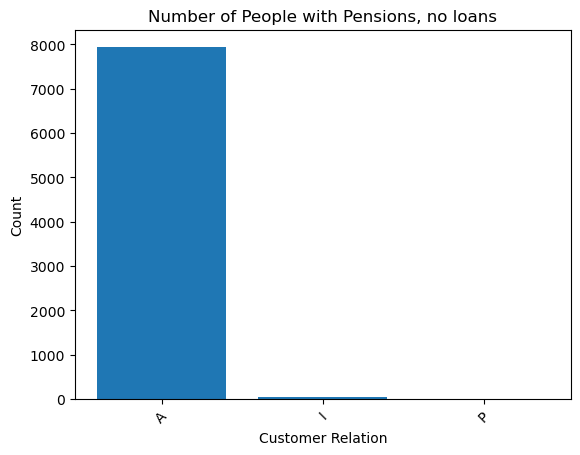

In [46]:
# Counted occurrences of each value in 'tiprel_1mes'
tiprel_1mes_counts = no_loans_with_pensions['tiprel_1mes'].value_counts()

# Bar chart
plt.bar(tiprel_1mes_counts.index, tiprel_1mes_counts.values)
plt.xlabel('Customer Relation')
plt.ylabel('Count')
plt.title('Number of People with Pensions, no loans')
plt.xticks(rotation = 45)
plt.show()


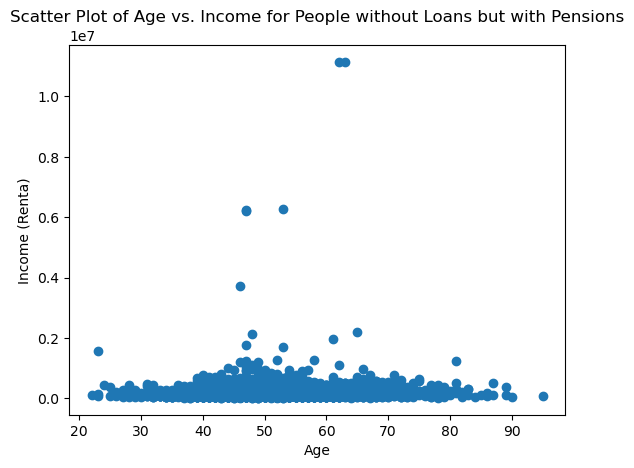

In [47]:
# Converted 'renta' and 'age' columns
no_loans_with_pensions['renta'] = pd.to_numeric(no_loans_with_pensions['renta'], errors = 'coerce')
no_loans_with_pensions['age'] = pd.to_numeric(no_loans_with_pensions['age'], errors = 'coerce')

# Dropped rows with missing values in 'age' or 'renta' columns
no_loans_with_pensions = no_loans_with_pensions.dropna(subset = ['age', 'renta'])

# Scatter plot
plt.scatter(no_loans_with_pensions['age'], no_loans_with_pensions['renta'])
plt.xlabel('Age')
plt.ylabel('Income (Renta)')
plt.title('Scatter Plot of Age vs. Income for People without Loans but with Pensions')
plt.show()


In [48]:
# Data frame for people with loans and pensions
loans_with_pensions = cross_data[
    (cross_data['ind_pres_fin_ult1'] == 1) & 
    (cross_data['ind_plan_fin_ult1'] == 1)
][['ncodpers', 'ind_pres_fin_ult1', 'ind_plan_fin_ult1', 'tiprel_1mes', 'renta', 'age', 'sexo', 'antiguedad', 'ind_empleado', 'nomprov', 'pais_residencia']].copy()

In [49]:
loans_with_pensions.drop_duplicates(subset = ['ncodpers'], keep = 'first', inplace = True)

In [50]:
loans_with_pensions.head()

,ncodpers,ind_pres_fin_ult1,ind_plan_fin_ult1,tiprel_1mes,renta,age,sexo,antiguedad,ind_empleado,nomprov,pais_residencia
317822,270710,1,1,A,113113.74,45,V,166,N,BARCELONA,ES
325554,315003,1,1,A,179240.07,63,V,162,N,CANTABRIA,ES
327455,295544,1,1,A,167058.60,45,V,122,N,SANTA CRUZ DE TENERIFE,ES
337054,235607,1,1,A,141911.37,43,V,172,N,ASTURIAS,ES
338556,214836,1,1,A,52300.80,43,V,174,N,MALAGA,ES


In [51]:
loans_with_pensions.describe()

,ncodpers,ind_pres_fin_ult1,ind_plan_fin_ult1,renta
count,53.000000,53.0,53.0,49.000000
mean,203322.358491,1.0,1.0,157400.472245
std,194234.643142,0.0,0.0,127291.991366
min,15927.000000,1.0,1.0,49902.210000
25%,59330.000000,1.0,1.0,87771.900000
50%,126522.000000,1.0,1.0,131490.900000
75%,294346.000000,1.0,1.0,191048.550000
max,842460.000000,1.0,1.0,784577.490000


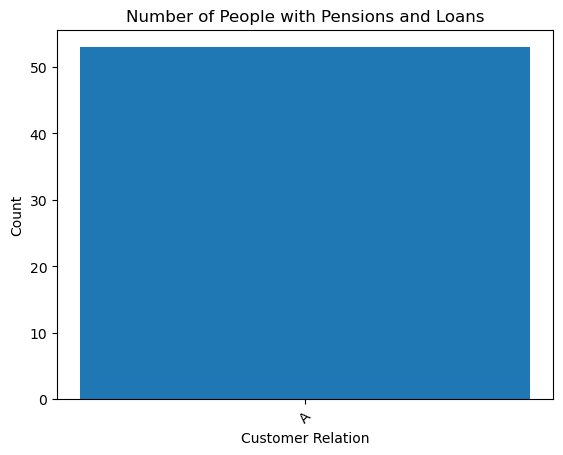

In [52]:
# Counted occurrences of each value in 'tiprel_1mes'
tiprel_1mes_counts = loans_with_pensions['tiprel_1mes'].value_counts()

# Bar chart
plt.bar(tiprel_1mes_counts.index, tiprel_1mes_counts.values)
plt.xlabel('Customer Relation')
plt.ylabel('Count')
plt.title('Number of People with Pensions and Loans')
plt.xticks(rotation = 45)
plt.show()


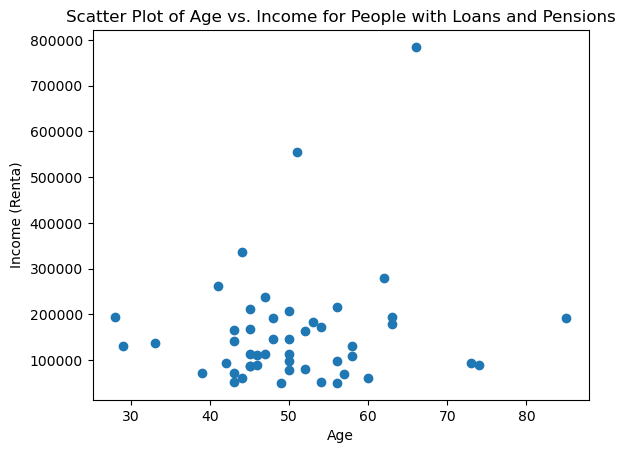

In [53]:
# Converted 'renta' and 'age' columns
loans_with_pensions['renta'] = pd.to_numeric(loans_with_pensions['renta'], errors = 'coerce')
loans_with_pensions['age'] = pd.to_numeric(loans_with_pensions['age'], errors = 'coerce')

# Dropped rows with missing values in 'age' or 'renta' columns
loans_with_pensions = loans_with_pensions.dropna(subset = ['age', 'renta'])

# Scatter plot
plt.scatter(loans_with_pensions['age'], loans_with_pensions['renta'])
plt.xlabel('Age')
plt.ylabel('Income (Renta)')
plt.title('Scatter Plot of Age vs. Income for People with Loans and Pensions')
plt.show()
